In [1]:
import os
import glob
import hashlib
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from skimage.measure import shannon_entropy
from skimage import io

In [2]:
# Chargement des métriques depuis un fichier CSV
df = pd.read_csv("metriques.csv")

In [3]:
def extraire_plante_maladie(chemin):
    """
    Extrait la plante et la maladie du chemin d'accès à l'image.
    
    Arguments:
    chemin (str): Le chemin complet de l'image.
    
    Retourne:
    tuple: (plante, maladie)
    """
    parties = chemin.split('\\')
    plante_maladie = parties[-2]
    plante, maladie = plante_maladie.split('___')
    return plante, maladie

In [4]:
# Application de la fonction à la colonne image_path pour extraire plante et maladie
df[['plante', 'maladie']] = df['image_path'].apply(lambda x: pd.Series(extraire_plante_maladie(x)))

# Sauvegarde des nouvelles métriques dans un fichier CSV
df.to_csv('metriques2.csv', index=False)

In [5]:
def identify_min_max_outliers(df, feature, n=5):
    """
    Identifie les n valeurs minimales et maximales pour une caractéristique donnée.
    
    Arguments:
    df (DataFrame): Le DataFrame contenant les données.
    feature (str): La caractéristique à analyser.
    n (int): Le nombre de valeurs min et max à identifier.
    
    Retourne:
    tuple: (min_outliers, max_outliers)
    """
    min_outliers = df.nsmallest(n, feature)
    max_outliers = df.nlargest(n, feature)
    return min_outliers, max_outliers

In [6]:
# Identification des outliers pour chaque caractéristique
features = ['sharpness', 'sobel', 'brightness', 'noise', 'snr', 'contrast', 'entropy', 'saturation']
outlier_image_paths_min = {}
outlier_image_paths_max = {}

for feature in features:
    min_outliers, max_outliers = identify_min_max_outliers(df, feature)
    outlier_image_paths_min[feature] = min_outliers[['image_path', 'plante', 'maladie']].values.tolist()
    outlier_image_paths_max[feature] = max_outliers[['image_path', 'plante', 'maladie']].values.tolist()

Min Outliers for feature: sharpness


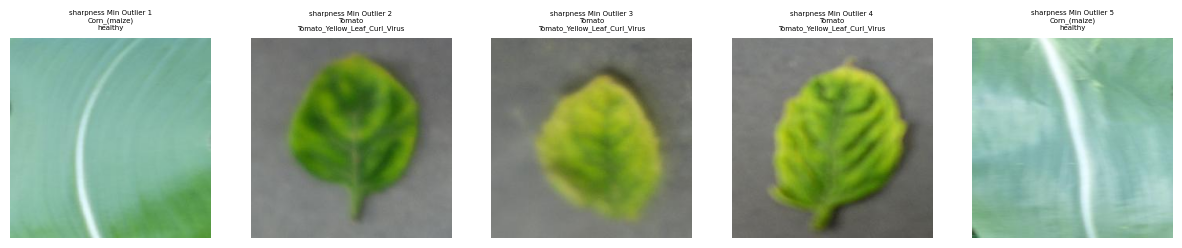

Max Outliers for feature: sharpness


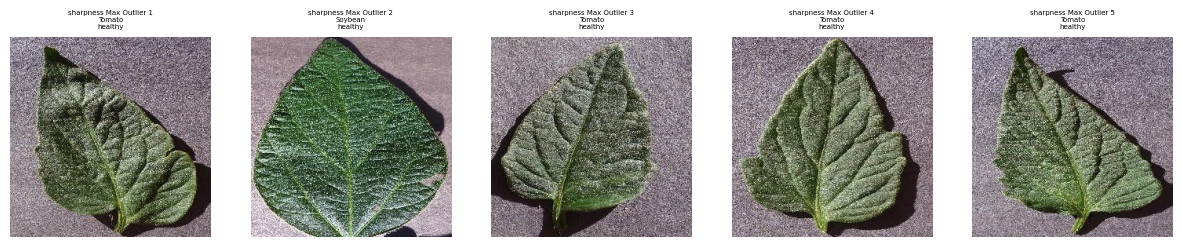

Min Outliers for feature: sobel


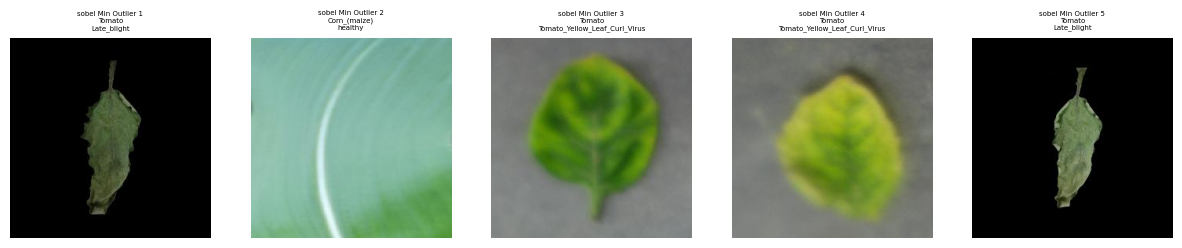

Max Outliers for feature: sobel


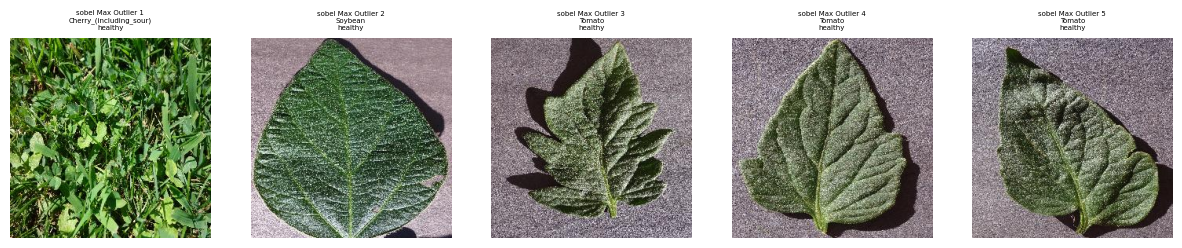

Min Outliers for feature: brightness


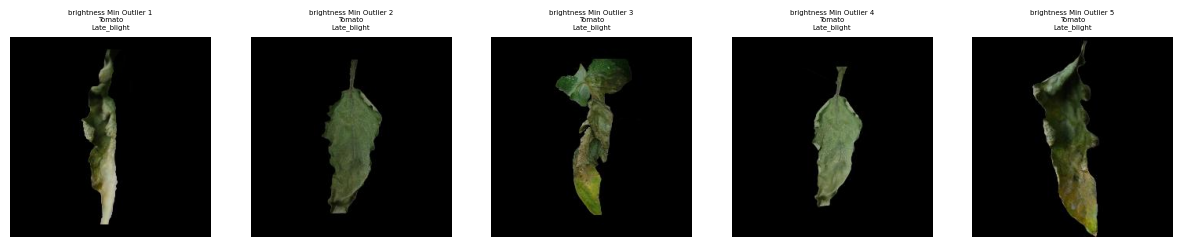

Max Outliers for feature: brightness


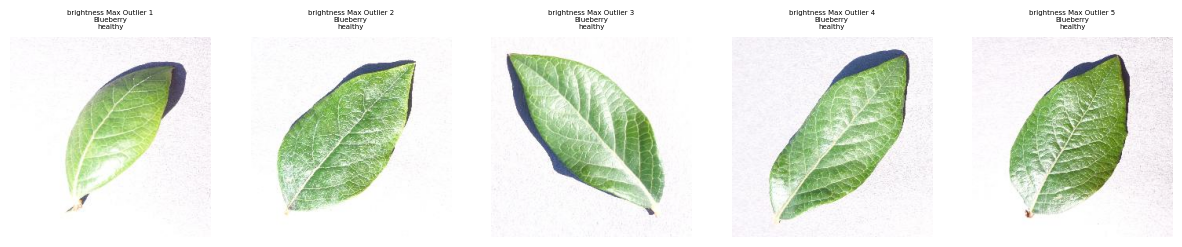

Min Outliers for feature: noise


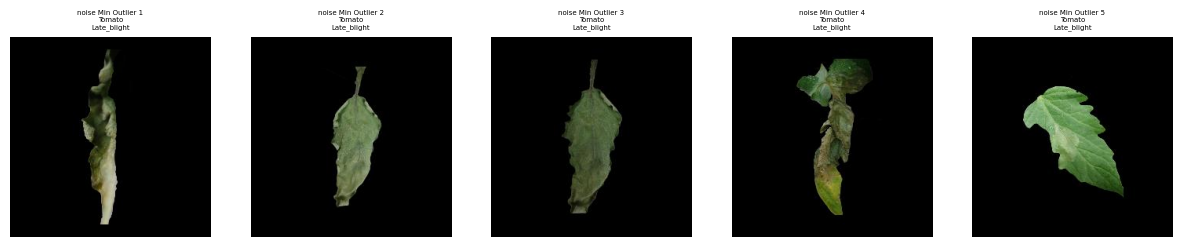

Max Outliers for feature: noise


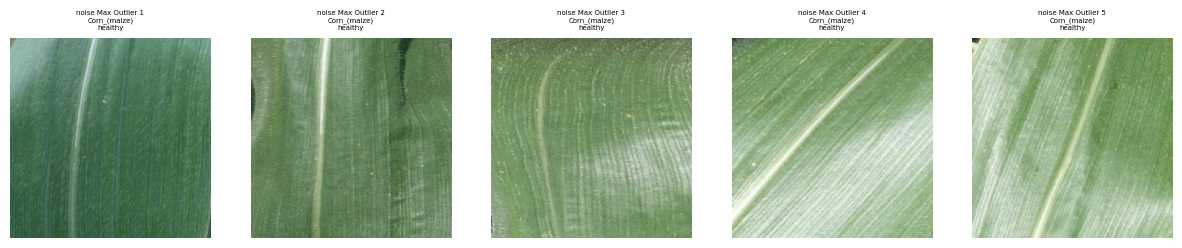

Min Outliers for feature: snr


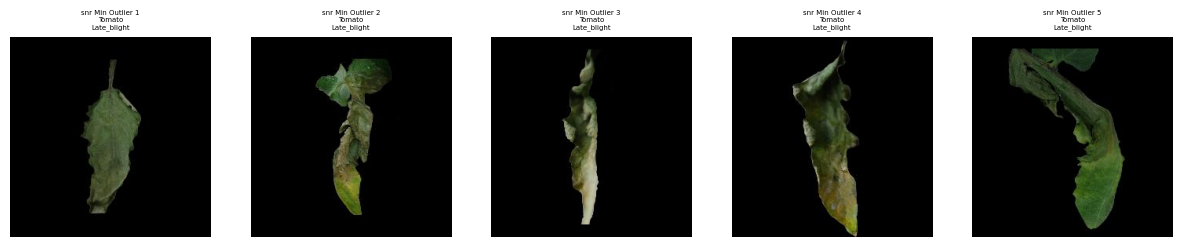

Max Outliers for feature: snr


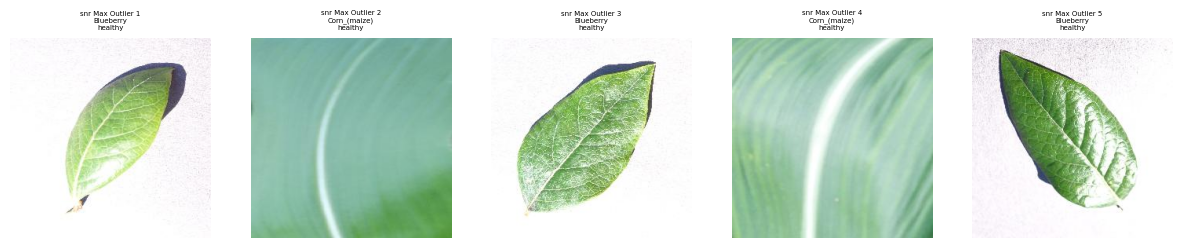

Min Outliers for feature: contrast


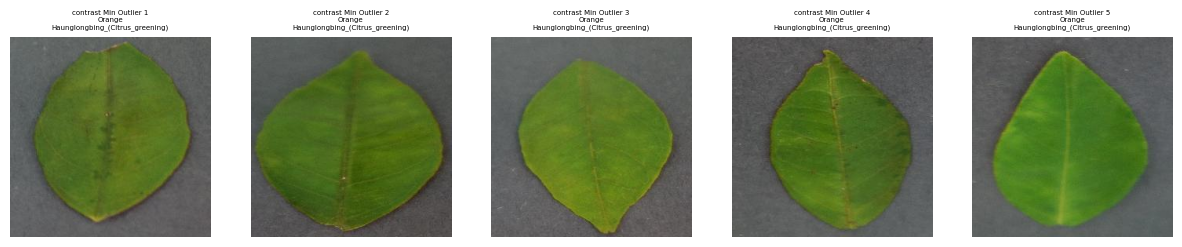

Max Outliers for feature: contrast


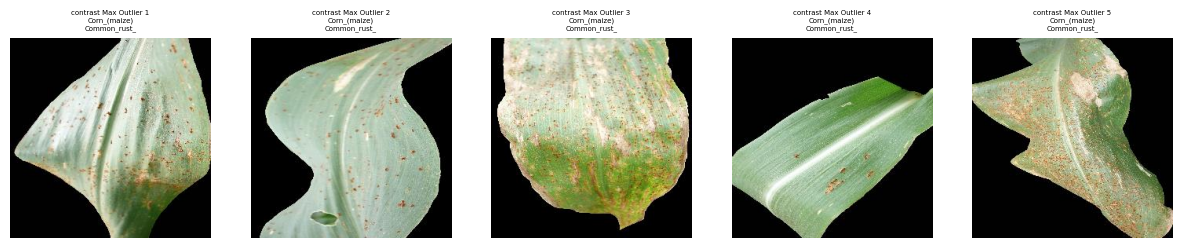

Min Outliers for feature: entropy


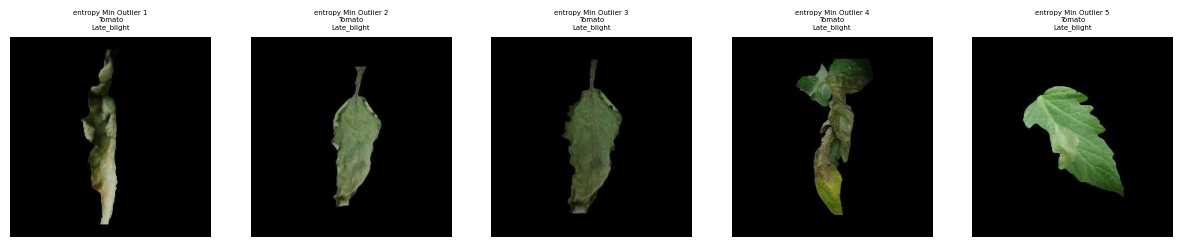

Max Outliers for feature: entropy


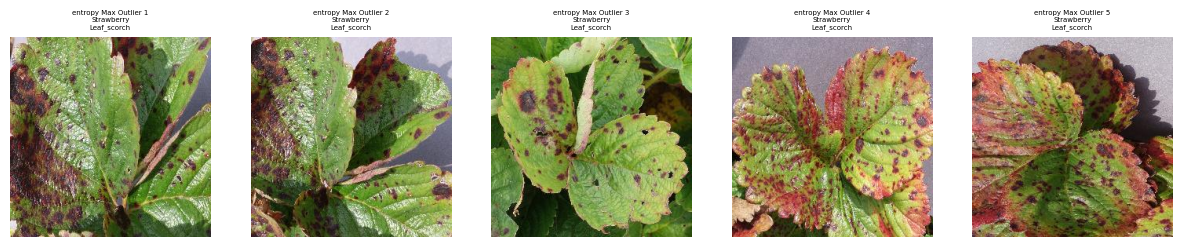

Min Outliers for feature: saturation


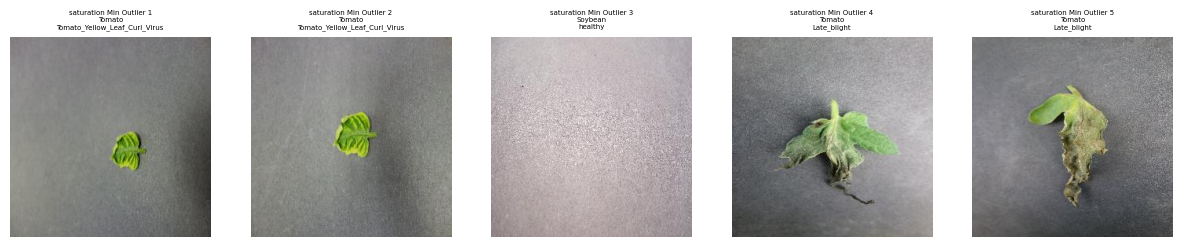

Max Outliers for feature: saturation


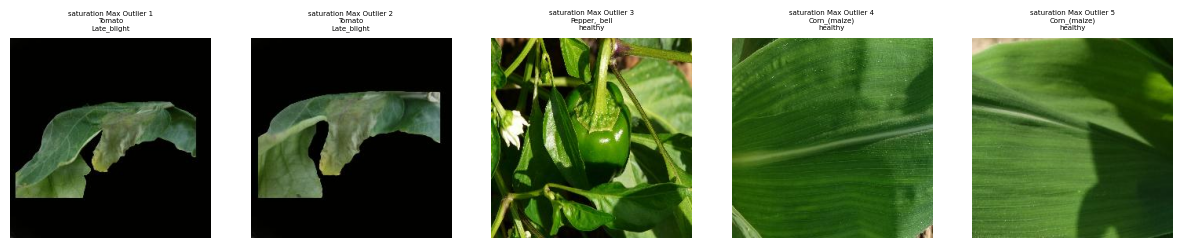

In [7]:
def display_images(image_paths, feature, outlier_type):
    """
    Affiche les images correspondant aux outliers d'une caractéristique donnée.
    
    Arguments:
    image_paths (list): Liste des chemins d'images à afficher.
    feature (str): La caractéristique analysée.
    outlier_type (str): Le type d'outlier ('Min Outlier' ou 'Max Outlier').
    """
    n_images = len(image_paths)
    plt.figure(figsize=(15, 5))
    for i, (image_path, plante, maladie) in enumerate(image_paths):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n_images, i + 1)
        plt.imshow(image)
        plt.title(f'{feature} {outlier_type} {i+1}\n{plante}\n{maladie}', fontsize=5)
        plt.axis('off')
    plt.show()

# Affichage des images des outliers min et max pour chaque caractéristique
for feature in features:
    print(f"Min Outliers for feature: {feature}")
    display_images(outlier_image_paths_min[feature], feature, 'Min Outlier')
    print(f"Max Outliers for feature: {feature}")
    display_images(outlier_image_paths_max[feature], feature, 'Max Outlier')


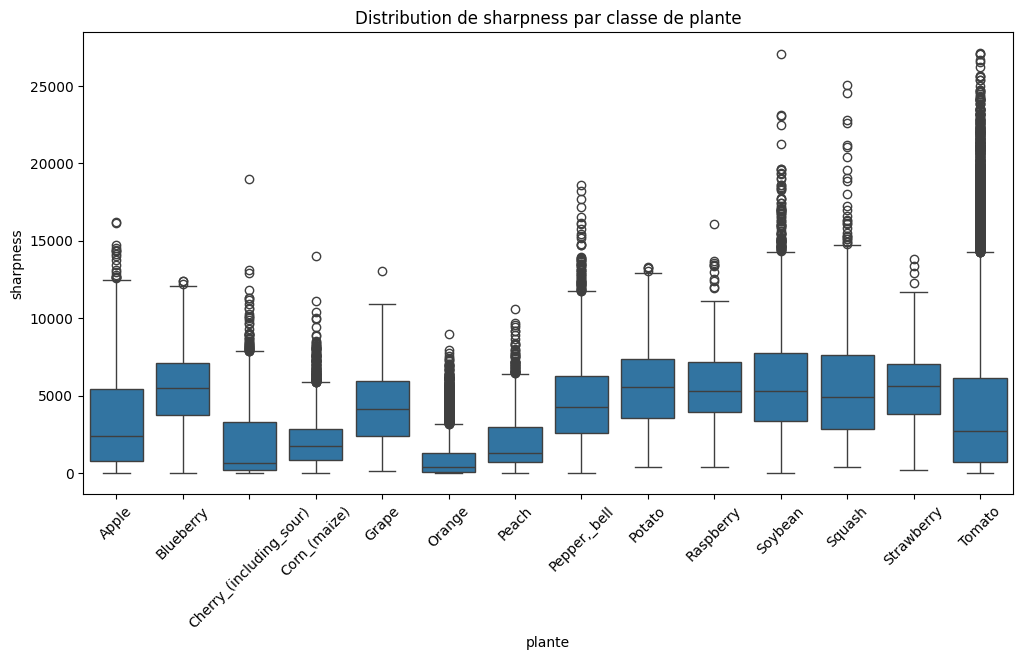

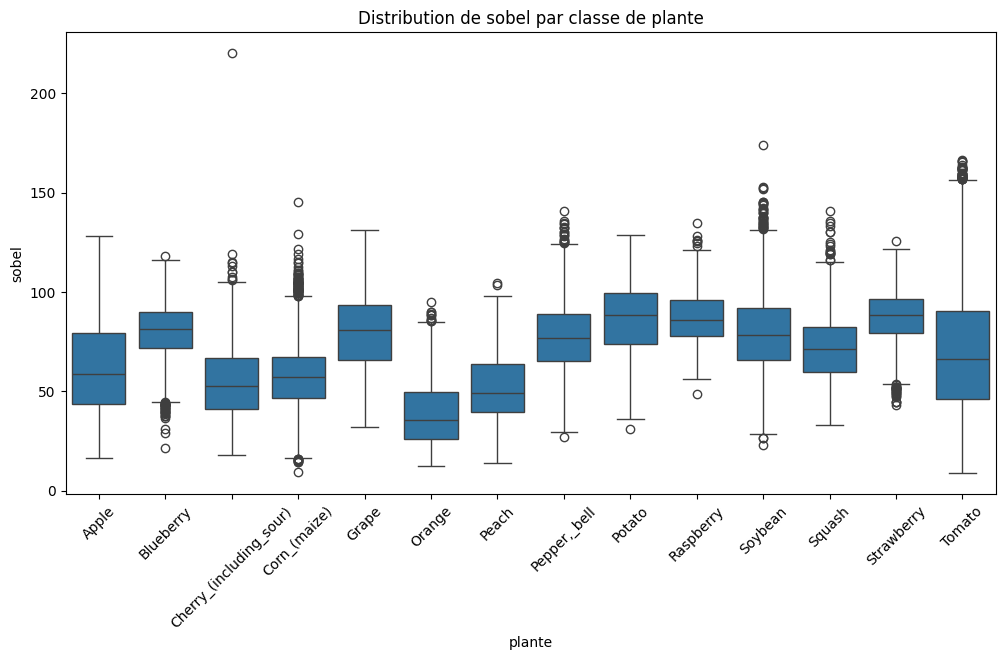

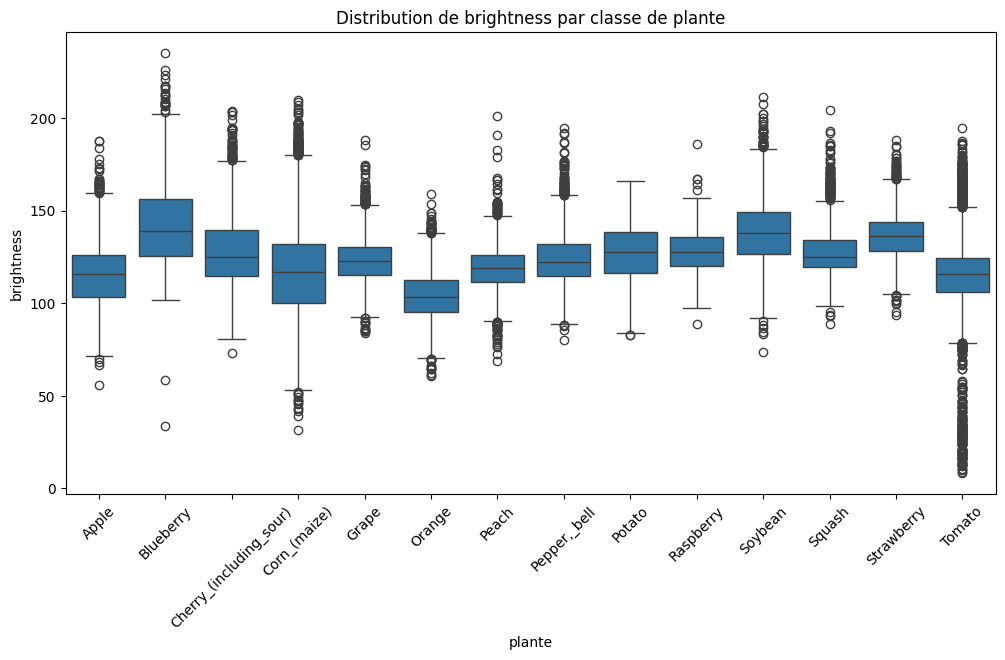

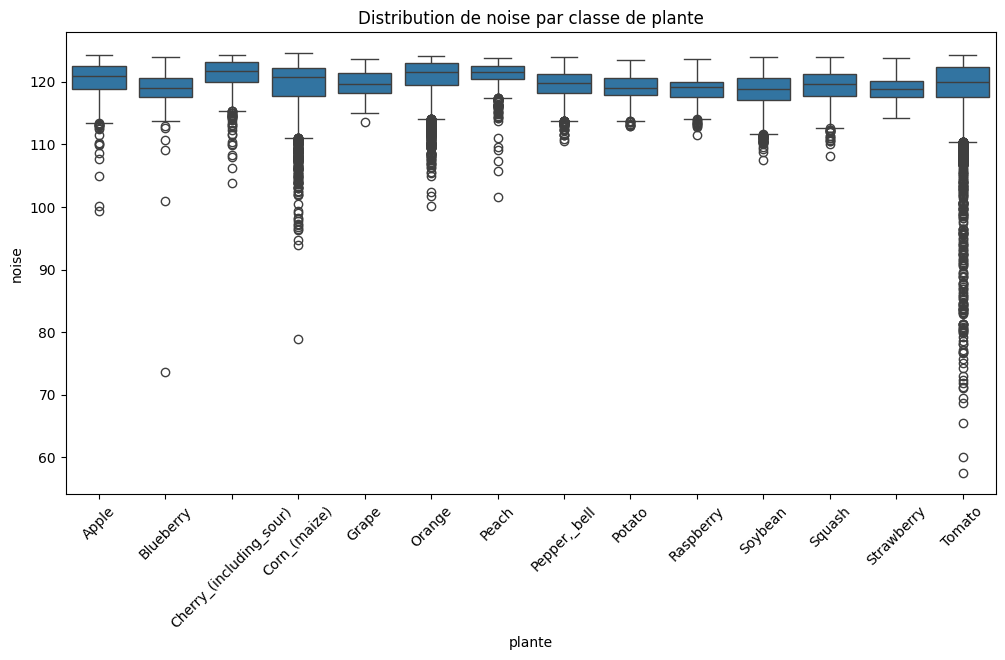

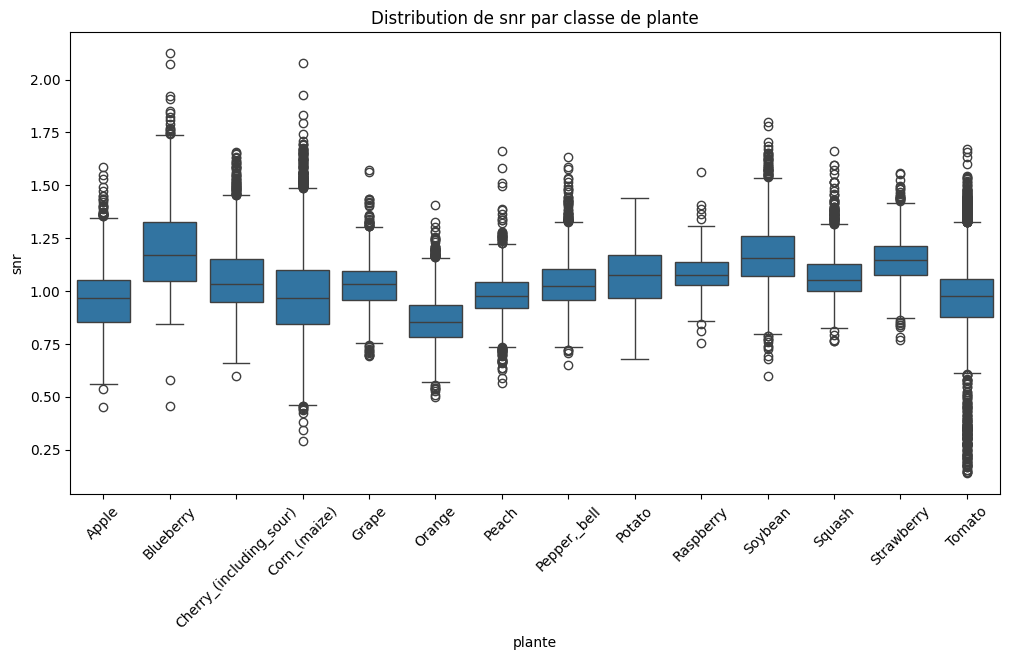

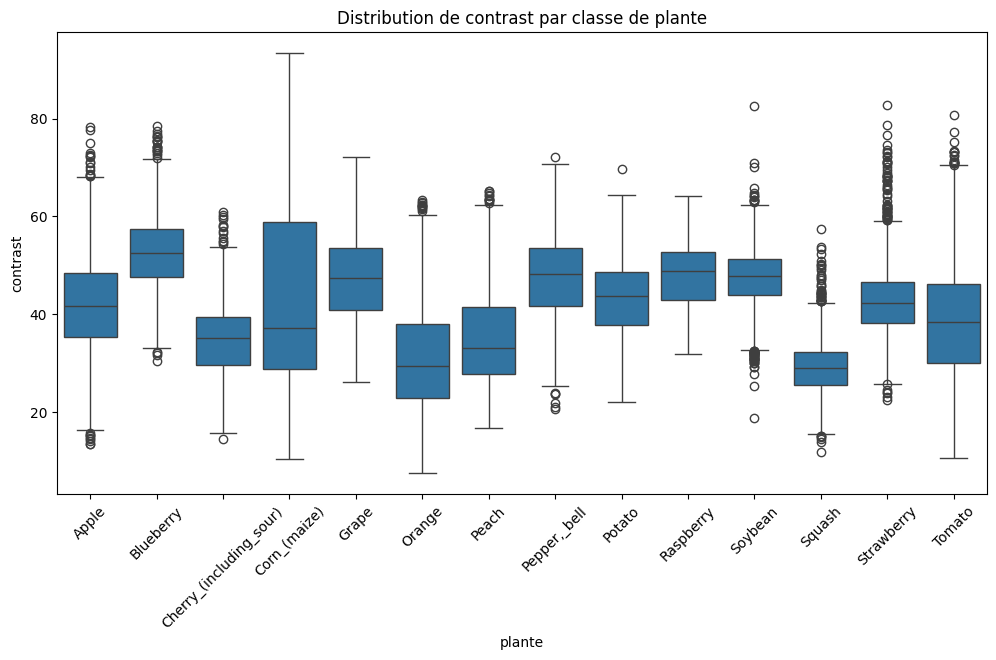

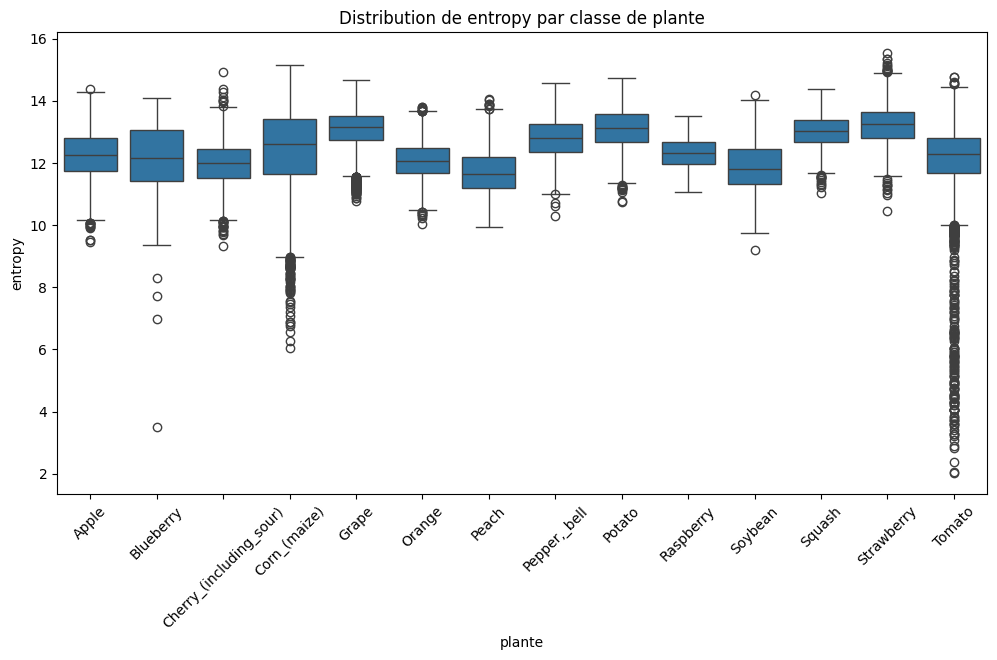

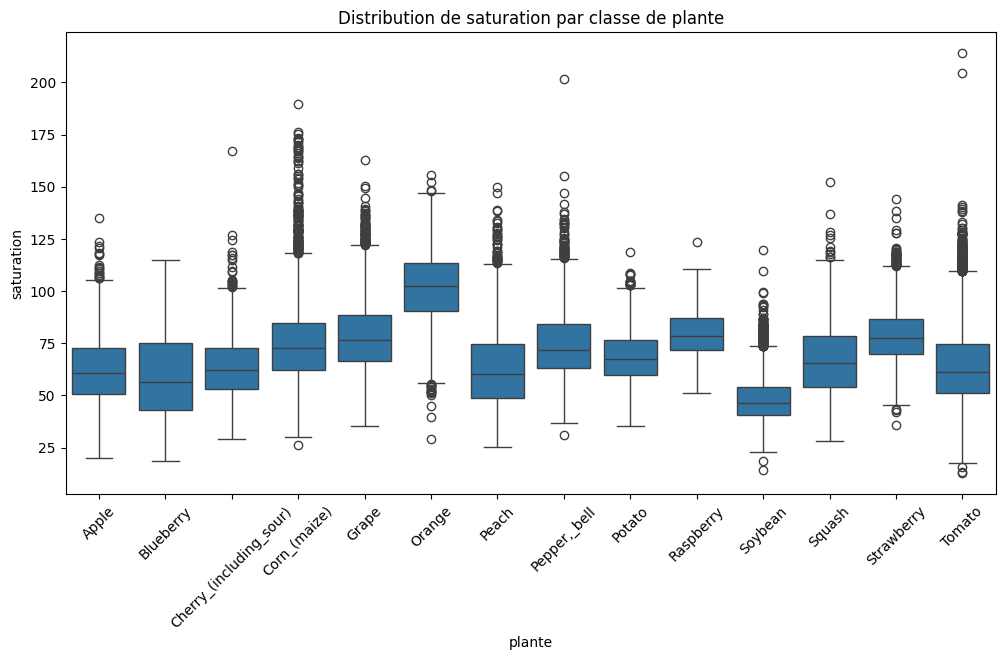

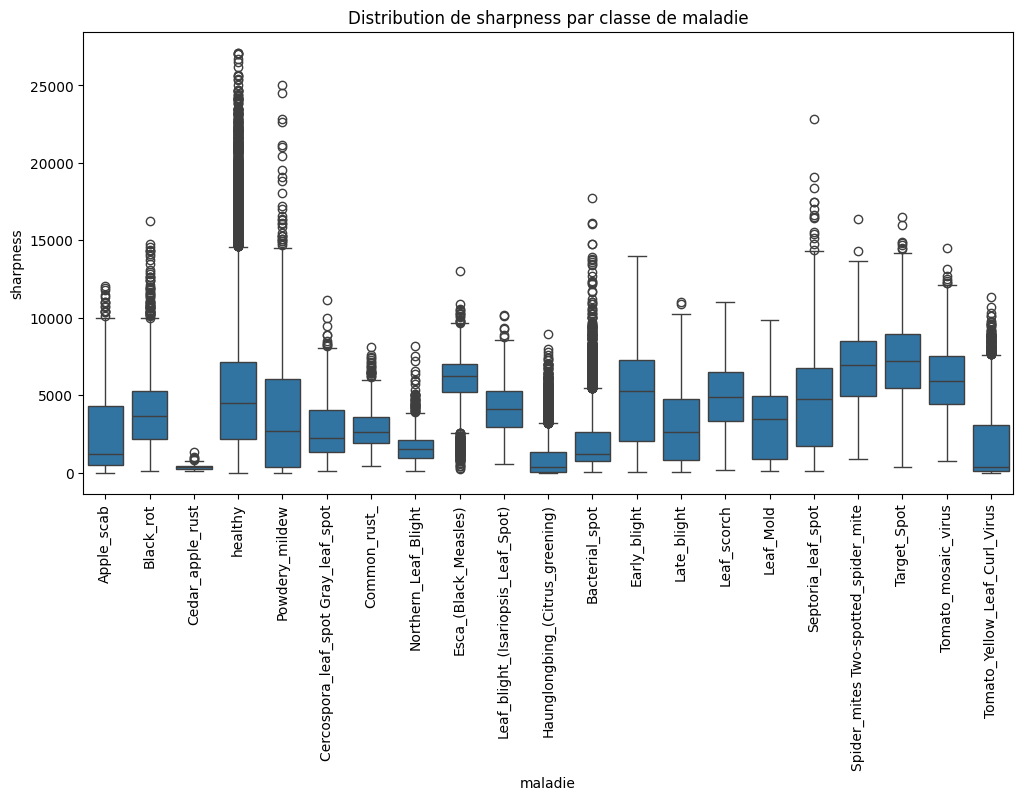

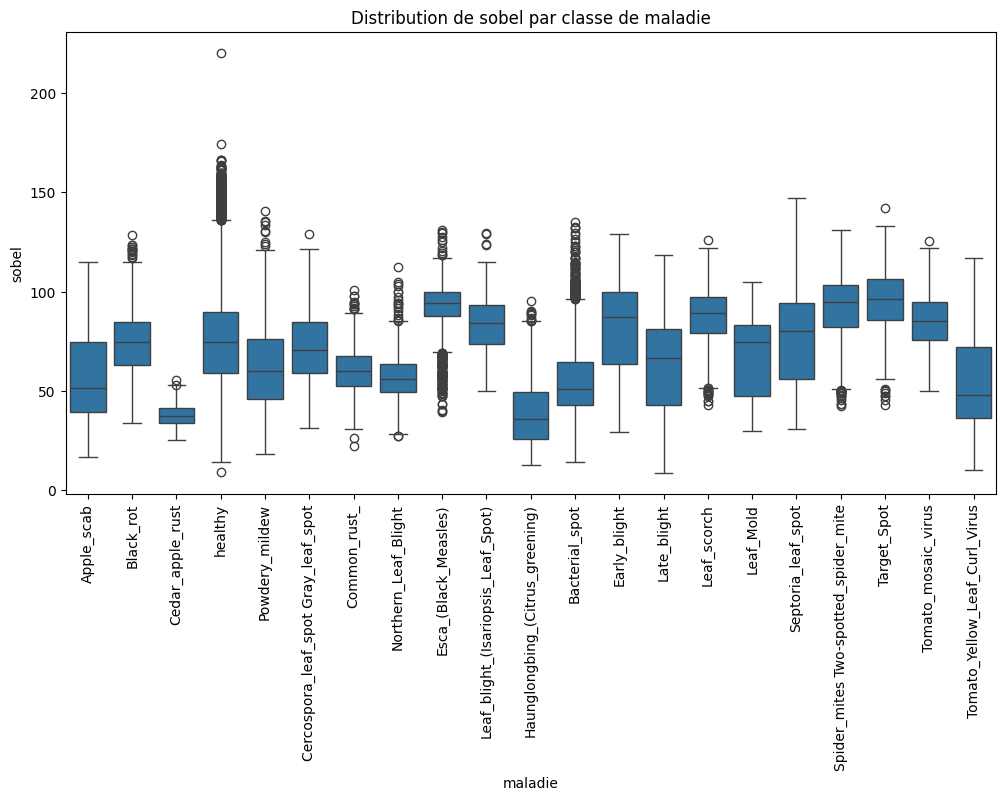

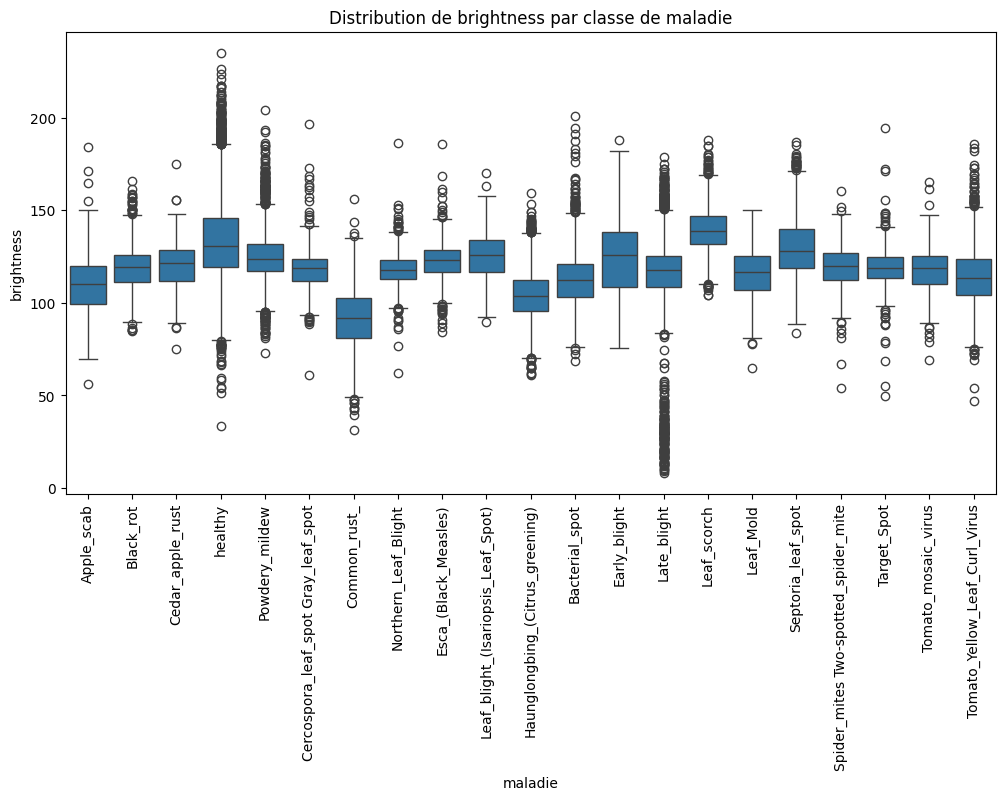

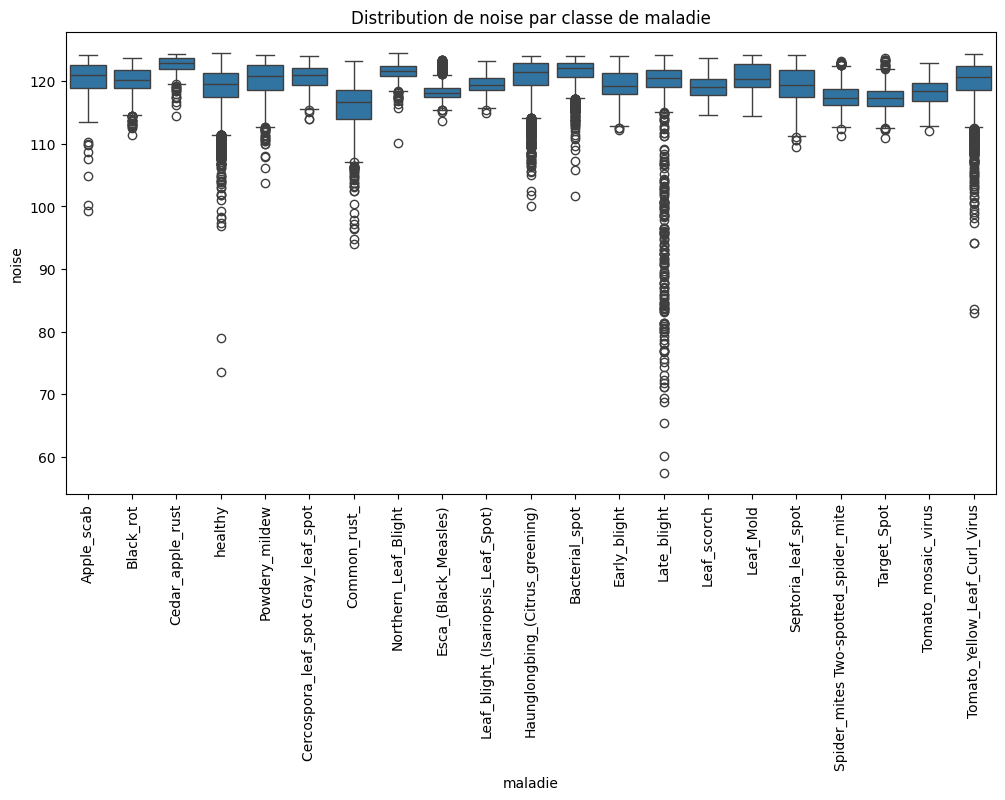

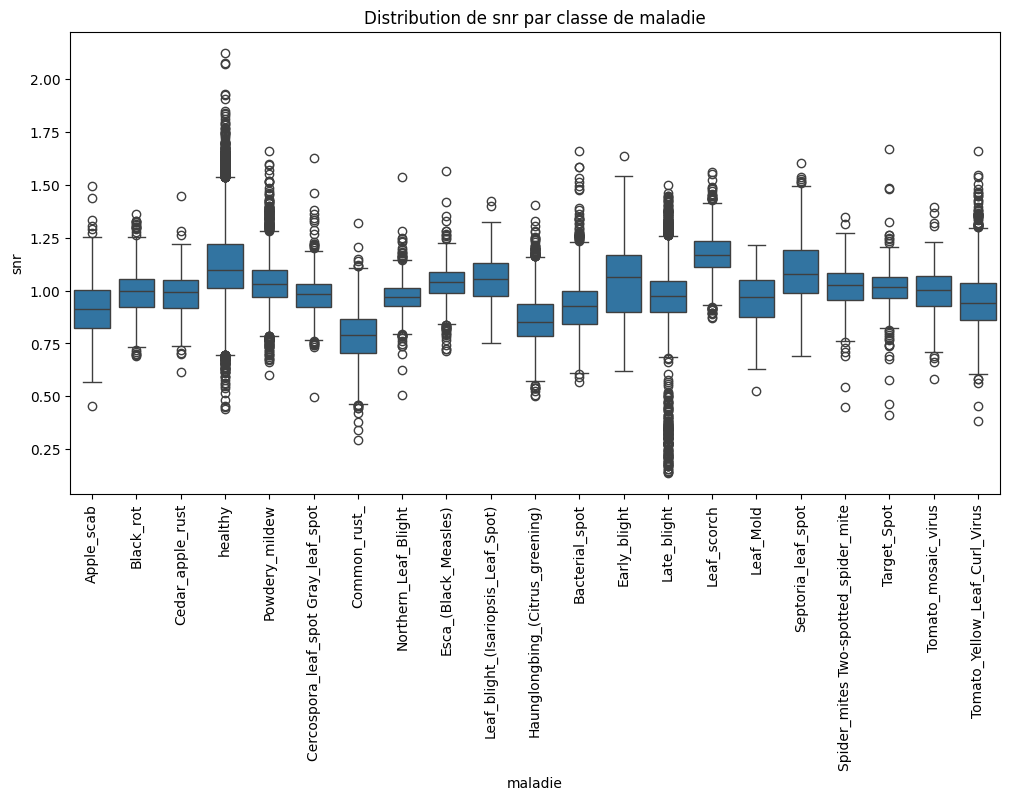

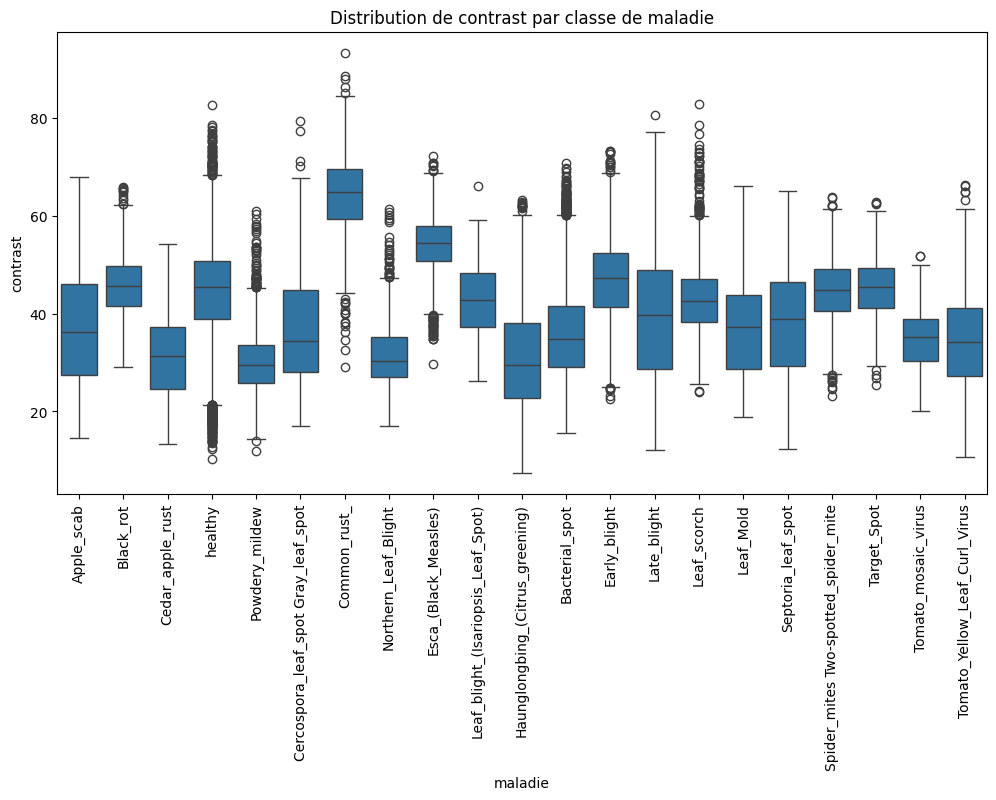

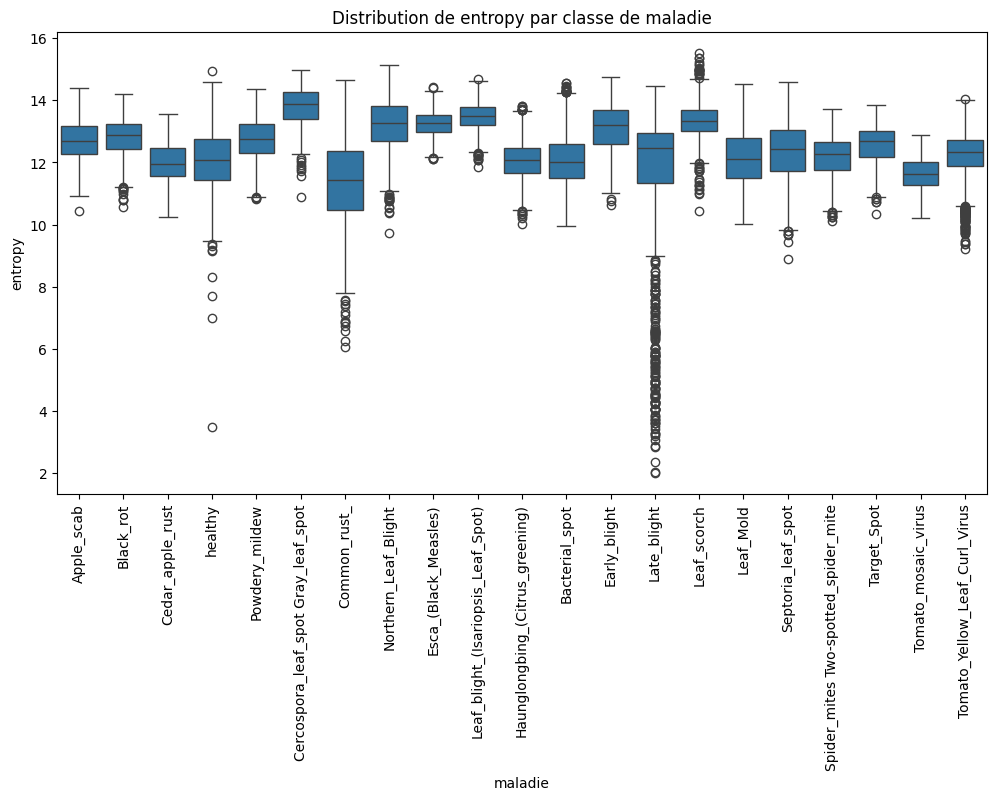

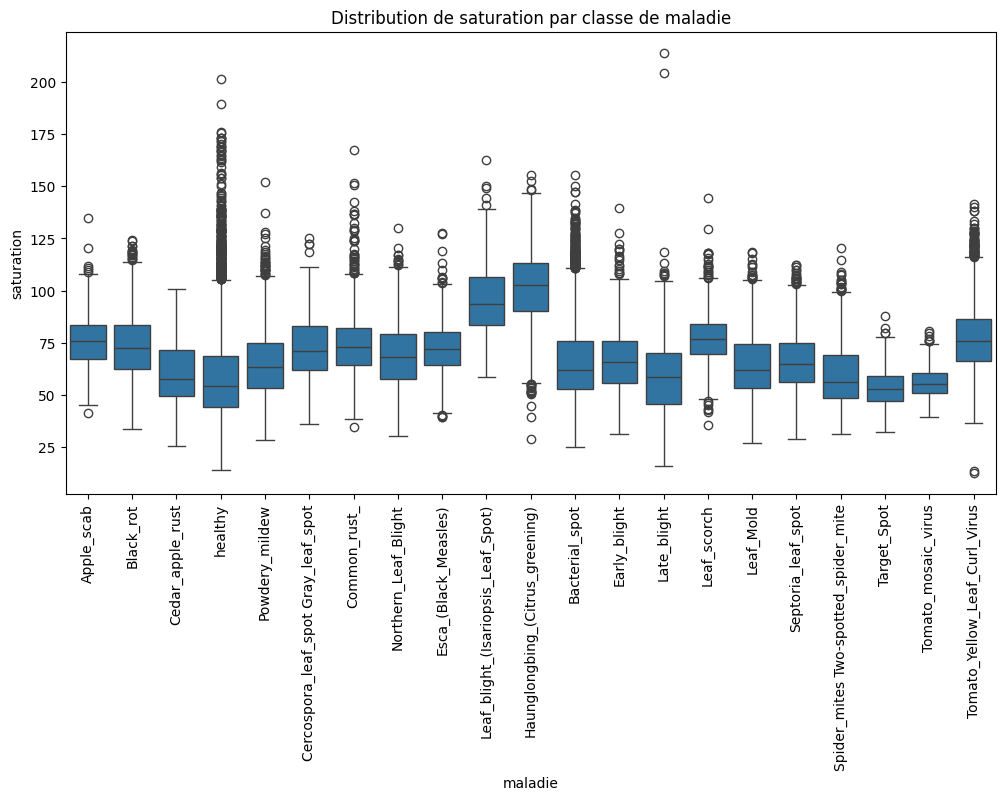

In [8]:
# Visualisation des distributions des métriques par classe de plante et de maladie
metrics = ["sharpness", "sobel", "brightness", "noise", "snr", "contrast", "entropy", "saturation"]

# Graphique de boîte pour chaque métrique par classe de plante
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="plante", y=metric)
    plt.title(f"Distribution de {metric} par classe de plante")
    plt.xticks(rotation=45)
    plt.show()

# Graphique de boîte pour chaque métrique par classe de maladie
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="maladie", y=metric)
    plt.title(f"Distribution de {metric} par classe de maladie")
    plt.xticks(rotation=90)
    plt.show()